## 大气数据处理及可视化 

- 知识点：大气（包括海洋）数据读取、处理及可视化，包括模式结果处理

- 工具：xarray, wrf-python, pandas, cartopy, regionmask

### 全球平均气温

我们使用以前课上用过的 NCEP 再分析资料 air.mon.mean.nc 来计算全球平均气温 (1948-2016)

In [1]:
import xarray as xr
import numpy as np
xr.set_options(display_style="text")

In [2]:
mon_air = xr.open_dataarray('air.mon.mean.nc')
mon_air

<xarray.DataArray 'air' (time: 832, lat: 73, lon: 144)>
[8745984 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2017-04-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  41.74902]

In [3]:
mon_air_2016 = mon_air.sel(time='2016')
mon_air_2016

<xarray.DataArray 'air' (time: 12, lat: 73, lon: 144)>
[126144 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  41.74902]

In [4]:
mon_air_2016.mean()

<xarray.DataArray 'air' ()>
array(5.7122564, dtype=float32)

这个结果合理吗？

- 每个月长度不同

参考 http://xarray.pydata.org/en/stable/examples/monthly-means.html

- 更重要的是，地球是个球体，各处的面积并不相同

在地球经度 $\varphi$ 和纬度 $\lambda$ 处，地球表面微元面积为

$$
dA = R^2\cos\lambda\,d\lambda\,d\varphi,\qquad  -\pi < \varphi < \pi,\, -\frac{\pi}{2} < \lambda < \frac{\pi}{2}, 
$$

所以在纬度 $[\lambda, \lambda+d\lambda]$ 之间，地球表面面积 $dA\propto\cos\lambda$。

- 我们忽略每月天数的不同，只考虑地球表面积的影响

- 建立一个纬度余弦值构成的权重数组，并归一化（权重之和为1）

- 先对经度求平均，再用权重对纬度求平均，最后对时间求平均；或者先对经度和时间求平均，再用权重对纬度求平均

In [5]:
mon_air_2016_zonal = mon_air_2016.mean(dim='lon')

In [6]:
weight = np.cos(np.deg2rad(mon_air_2016.lat))
weight

<xarray.DataArray 'lat' (lat: 73)>
array([-4.3711388e-08,  4.3619454e-02,  8.7155797e-02,  1.3052624e-01,
        1.7364822e-01,  2.1643965e-01,  2.5881907e-01,  3.0070582e-01,
        3.4202015e-01,  3.8268346e-01,  4.2261827e-01,  4.6174860e-01,
        4.9999997e-01,  5.3729957e-01,  5.7357645e-01,  6.0876143e-01,
        6.4278758e-01,  6.7559016e-01,  7.0710677e-01,  7.3727733e-01,
        7.6604444e-01,  7.9335332e-01,  8.1915206e-01,  8.4339142e-01,
        8.6602539e-01,  8.8701081e-01,  9.0630776e-01,  9.2387950e-01,
        9.3969262e-01,  9.5371693e-01,  9.6592581e-01,  9.7629601e-01,
        9.8480773e-01,  9.9144489e-01,  9.9619472e-01,  9.9904823e-01,
        1.0000000e+00,  9.9904823e-01,  9.9619472e-01,  9.9144489e-01,
        9.8480773e-01,  9.7629601e-01,  9.6592581e-01,  9.5371693e-01,
        9.3969262e-01,  9.2387950e-01,  9.0630776e-01,  8.8701081e-01,
        8.6602539e-01,  8.4339142e-01,  8.1915206e-01,  7.9335332e-01,
        7.6604444e-01,  7.3727733e-01,  7.0710677e-01,  6.7559016e-01,
        6.4278758e-01,  6.0876143e-01,  5.7357645e-01,  5.3729957e-01,
        4.9999997e-01,  4.6174860e-01,  4.2261827e-01,  3.8268346e-01,
        3.4202015e-01,  3.0070582e-01,  2.5881907e-01,  2.1643965e-01,
        1.7364822e-01,  1.3052624e-01,  8.7155797e-02,  4.3619454e-02,
       -4.3711388e-08], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [7]:
mon_air_2016_mean = (mon_air_2016_zonal.weighted(weight)).mean(dim='lat')

注意：此处用到了 `xarray` 的广播功能 

In [8]:
mon_air_2016_mean.mean().values

array(14.723972, dtype=float32)

这个结果就合理了。

接下来，我们计算 1948-2016 年的年平均气温

In [9]:
mon_air = mon_air.sel(time=slice('1948','2016'))
annual_mean_temp = (mon_air.mean(dim='lon').resample(time='AS')
                    .mean(dim='time').weighted(weight)).mean(dim='lat')

In [10]:
annual_mean_temp

<xarray.DataArray (time: 69)>
array([13.627374 , 13.63256  , 13.542421 , 13.688788 , 13.786775 ,
       13.852996 , 13.569222 , 13.556584 , 13.479174 , 13.794247 ,
       13.811653 , 13.766874 , 13.652037 , 13.691757 , 13.637964 ,
       13.642024 , 13.4713545, 13.554589 , 13.627971 , 13.68065  ,
       13.647916 , 13.786194 , 13.764481 , 13.587351 , 13.728676 ,
       13.853309 , 13.572137 , 13.602747 , 13.5329075, 13.880501 ,
       13.803485 , 13.897291 , 14.044812 , 14.026324 , 13.751034 ,
       13.96955  , 13.822173 , 13.812693 , 13.914178 , 14.030236 ,
       14.045397 , 13.876189 , 14.090269 , 14.04588  , 13.754866 ,
       13.700959 , 13.811932 , 13.991104 , 13.831577 , 14.049007 ,
       14.265602 , 14.006957 , 13.999394 , 14.193729 , 14.293406 ,
       14.2818575, 14.193888 , 14.404059 , 14.341925 , 14.346483 ,
       14.214868 , 14.327676 , 14.3926325, 14.252834 , 14.3145895,
       14.354452 , 14.383326 , 14.522596 , 14.723971 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1949-01-01 ... 2016-01-01

Text(0, 0.5, 'Annual mean temperature (°C)')

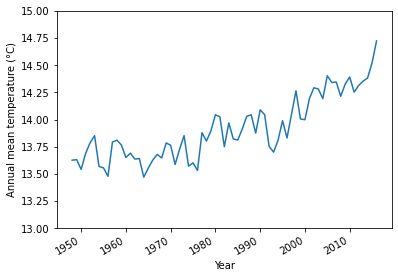

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline 

fig,ax=plt.subplots()
annual_mean_temp.plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylim([13,15])
ax.set_ylabel('Annual mean temperature ('+u'\u00B0'+'C)')  # 度的 unicode 

Text(0, 0.5, 'Annual temperature anomaly (°C)')

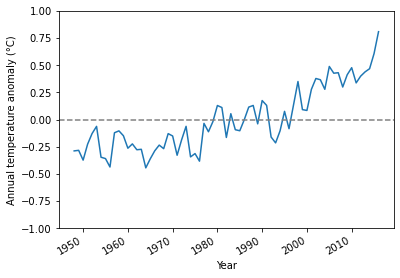

In [12]:
fig,ax=plt.subplots()
anomaly = annual_mean_temp - annual_mean_temp.mean()
anomaly.plot(ax=ax)
ax.axhline(0,linestyle='--',color='grey')
ax.set_xlabel('Year')
ax.set_ylim([-1,1])
ax.set_ylabel('Annual temperature anomaly ('+u'\u00B0'+'C)')  # 度的 unicode 

- 我们使用 Theil-Sen 方法来计算气温的趋势。 

- Theil-Sen 是一种基于秩（rank）的非参数化（non-parametric）的统计方法，对数据的分布不做任何假设，对 outlier 有很强的稳定性

In [13]:
from scipy import stats

t = anomaly.time.dt.year.values
X = t - t.mean()

slope, y0, beta_lr, beta_up = stats.mstats.theilslopes(anomaly.values, X, 
                                                       alpha=0.95)

print('Mean value = ', y0)
print('Trend = ', slope)
print('95% confidence interval:', '[', beta_lr, ',', beta_up, ']')

Mean value =  -0.0830078125
Trend =  0.012706676166727795
95% confidence interval: [ 0.010791723544781025 , 0.014703750610351562 ]


- 可见，1948 - 2016 年间，全球平均气温增加幅度为 0.013 $^o$C/年，或者 0.13 $^o$C/10年。 

- 我们可以将趋势直线和对应 95% 置信区间的两条趋势直线加到上图中。

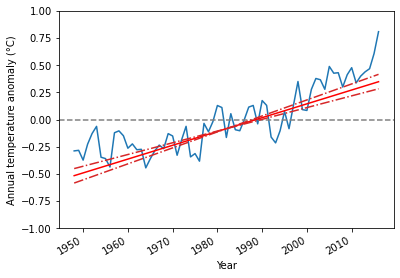

In [14]:
fig,ax=plt.subplots()
anomaly = annual_mean_temp - annual_mean_temp.mean()
anomaly.plot(ax=ax)
ax.axhline(0,linestyle='--',color='grey')
ax.set_xlabel('Year')
ax.set_ylim([-1,1])
ax.set_ylabel('Annual temperature anomaly ('+u'\u00B0'+'C)')  # 度的 unicode 

ax.plot(anomaly.time, y0+slope*(t-t.mean()),color='r')
ax.plot(anomaly.time, y0+beta_lr*(t-t.mean()),color='tab:red',linestyle='-.')
ax.plot(anomaly.time, y0+beta_up*(t-t.mean()),color='tab:red',linestyle='-.')

#### 中国区域的平均气温

- 如果我们需要用上面的数据集，求中国的平均气温，该怎么办？

- 我们需要单独提取出中国区域的气温，将其它区域屏蔽掉

- `regionmask` 包提供这样的功能

- 我们利用 `simplified_china_country.shp` 文件来提取中国区域的气温。由于该 shapefile 不包括海洋，所以我们只计算中国陆地上的平均气温

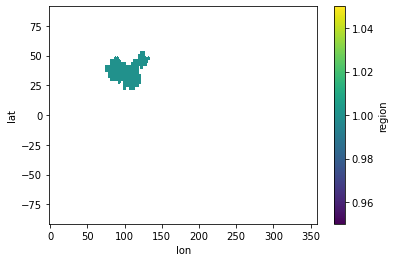

In [15]:
import regionmask
import geopandas as gpd

china_shp = gpd.read_file('../shp_file/simplied_china_country.shp',encoding='utf8')
china_mask_poly = regionmask.Regions(china_shp.geometry,names='china')

china_mask = china_mask_poly.mask(mon_air)
#china_mask= np.ma.masked_invalid(china_mask)
china_mask = xr.where(china_mask==0,1.0,china_mask)
china_mask.plot()

In [16]:
china_temp = mon_air*china_mask
china_temp

<xarray.DataArray (time: 828, lat: 73, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2016-12-01

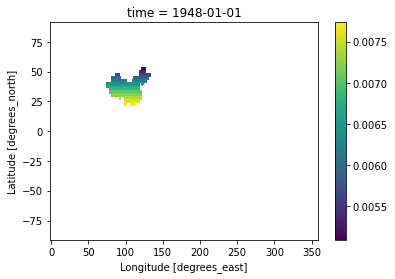

In [17]:
annual_china_mean_temp = china_temp.resample(time='AS').mean(dim='time')
china_weight = xr.DataArray(np.tile(np.cos(np.deg2rad(annual_china_mean_temp.lat)).values, 
                                    (len(annual_china_mean_temp.lon),1)).T,
                                    dims=['lat','lon'],
                                    coords={'lon':annual_china_mean_temp.lon,'lat':annual_china_mean_temp.lat})
china_weight = china_weight.where(~np.isnan(annual_china_mean_temp.isel(time=0)))
china_weight = china_weight/china_weight.sum()
china_weight.plot()

In [18]:
weighted_mean = (annual_china_mean_temp*china_weight).sum(dim=['lon','lat'])
weighted_mean

<xarray.DataArray (time: 69)>
array([6.00252245, 5.5262691 , 5.5719012 , 5.70178283, 5.63743712,
       5.78923133, 5.52567758, 5.55231086, 5.02751334, 5.05981022,
       5.80275971, 5.76755194, 5.5579304 , 5.58284571, 5.25716052,
       5.66430706, 5.37841569, 5.5736212 , 5.70741857, 5.12341224,
       5.35255999, 5.21369367, 5.38544521, 5.14870246, 5.16982935,
       5.61039527, 4.87386947, 5.38338392, 4.97444959, 5.54149615,
       5.45099197, 5.60702818, 5.46653624, 5.39721418, 5.59683034,
       5.34149105, 4.9014431 , 5.17419616, 5.26396819, 5.77013423,
       5.62259181, 5.53908119, 5.93941256, 5.56128708, 5.3924108 ,
       5.34070857, 5.81930224, 5.56635797, 5.34298067, 5.90813401,
       6.53288502, 6.2486403 , 5.64889475, 6.08367246, 6.1787809 ,
       5.89860635, 6.13613846, 5.80128953, 6.48765794, 6.54522217,
       6.01826287, 6.13936008, 6.03853043, 5.63487924, 5.45795952,
       6.35044402, 6.30444362, 6.62997998, 6.75963839])
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1949-01-01 ... 2016-01-01

In [19]:
china_anomaly = weighted_mean - weighted_mean.mean()

t = china_anomaly.time.dt.year.values
X = t - t.mean()

slope, y0, beta_lr, beta_up = stats.mstats.theilslopes(china_anomaly.values, X, 
                                                       alpha=0.95)

print('Mean value = ', y0)
print('Trend = ', slope)
print('95% confidence interval:', '[', beta_lr, ',', beta_up, ']')

Mean value =  -0.07456140253892407
Trend =  0.010559139967498625
95% confidence interval: [ 0.00609306997127276 , 0.016278539880497767 ]


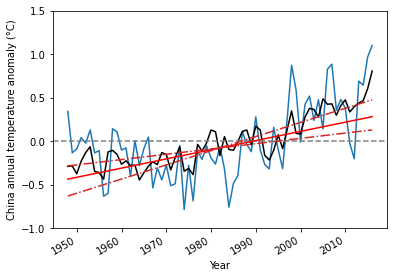

In [20]:
fig,ax=plt.subplots()

china_anomaly.plot(ax=ax)
anomaly.plot(ax=ax,color='k')
ax.axhline(0,linestyle='--',color='grey')
ax.set_xlabel('Year')
ax.set_ylim([-1,1.5])
ax.set_ylabel('China annual temperature anomaly ('+u'\u00B0'+'C)')  # 度的 unicode 

ax.plot(china_anomaly.time, y0+slope*(t-t.mean()),color='r')
ax.plot(china_anomaly.time, y0+beta_lr*(t-t.mean()),color='tab:red',linestyle='-.')
ax.plot(china_anomaly.time, y0+beta_up*(t-t.mean()),color='tab:red',linestyle='-.')

### WRF 数据处理和可视化

- WRF（Weather Research and Forecasting）是广泛应用的区域气象模式

- WRF 是大家数值天气预报课程使用的模式

- WRF 模式的输出是 netCDF 文件，但不是符合 CF（Climate and Forecasting）标准的文件

- NCAR 提供了 `wrf-python` 模块来实现 NCL 中关于 WRF 的部分功能，也提供了 `xarray` 的接口

- WRF 使用交错网格，即 Arakawa C 网格

![](WRF_staggered_grid.gif)

In [21]:
!ncdump -h wrfout_d01_2015-09-24_13_extracted.nc

netcdf wrfout_d01_2015-09-24_13_extracted {
dimensions:
	Time = UNLIMITED ; // (1 currently)
	bottom_top = 50 ;
	south_north = 449 ;
	west_east = 649 ;
	bottom_top_stag = 51 ;
	DateStrLen = 19 ;
	west_east_stag = 650 ;
	south_north_stag = 450 ;
variables:
	float EXTCOF55(Time, bottom_top, south_north, west_east) ;
		EXTCOF55:FieldType = 104 ;
		EXTCOF55:MemoryOrder = "XYZ" ;
		EXTCOF55:description = "Extinction coefficients for .55um" ;
		EXTCOF55:units = "km^-1" ;
		EXTCOF55:stagger = "" ;
		EXTCOF55:coordinates = "XLONG XLAT XTIME" ;
	float HGT(Time, south_north, west_east) ;
		HGT:FieldType = 104 ;
		HGT:MemoryOrder = "XY " ;
		HGT:description = "Terrain Height" ;
		HGT:units = "m" ;
		HGT:stagger = "" ;
		HGT:coordinates = "XLONG XLAT XTIME" ;
	float P(Time, bottom_top, south_north, west_east) ;
		P:FieldType = 104 ;
		P:MemoryOrder = "XYZ" ;
		P:description = "perturbation pressure" ;
		P:units = "Pa" ;
		P:stagger = "" ;
		P:coordinates = "XLONG XLAT XTIME" ;
	float PB(Time, bott

In [22]:
import wrf
import xarray
from netCDF4 import Dataset

首先读入文件

In [23]:
ifile = 'wrfout_d01_2015-09-24_13_extracted.nc'
title_str = '21:00 24 Sep 2015'
file_str = '20150924_2100'

fin = Dataset(ifile)

其次，读取所需的变量

In [24]:
PM25 = wrf.getvar(fin,'PM2_5_DRY')
lats, lons = wrf.latlon_coords(PM25)
cart_proj = wrf.get_cartopy(PM25)
p = wrf.getvar(fin, "pressure") 
ua = wrf.getvar(fin, "ua", units="m s-1") 
va = wrf.getvar(fin, "va", units="m s-1") 
wspd = wrf.getvar(fin, "wspd_wdir", units="m s-1")[0,:]

再将相关变量插值到 925 hPa 高度（海拔约 1 km）

In [25]:
# Interpolate u, and v winds to 925 hPa
u_925 = wrf.interplevel(ua, p, 925)
v_925 = wrf.interplevel(va, p, 925)
wspd_925 = wrf.interplevel(wspd, p, 925) 

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker

/opt/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1841: RuntimeWarning: invalid value encountered in cos
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/opt/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1841: RuntimeWarning: invalid value encountered in sin
  u, v = self.projection.transform_vectors(t, x, y, u, v)


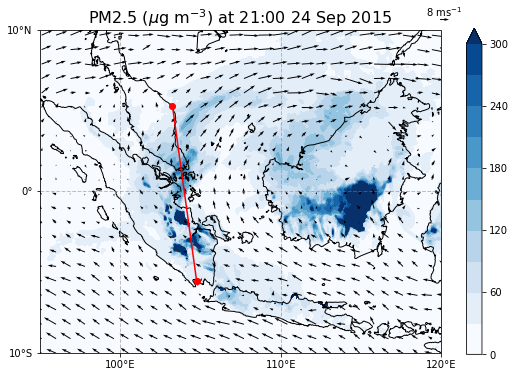

In [27]:
fig, ax = plt.subplots(figsize=(9,6),subplot_kw={'projection':cart_proj})

PM25.sel(bottom_top=0).plot.contourf(x='XLONG',y='XLAT',vmin=0,vmax=300,
        levels=11,transform=ccrs.PlateCarree(),
        ax=ax,cmap='Blues',cbar_kwargs={'label':''})
ax.coastlines('10m')
ax.set_extent([95,120,-10,10], crs=ccrs.PlateCarree())
ax.set_xticks([100,110,120], crs=ccrs.PlateCarree())
ax.set_yticks([-10,0,10], crs=ccrs.PlateCarree())
ax.set_xlabel('')
ax.set_ylabel('')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,\
          linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([90, 100, 110, 120])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20])

ax.set_title('PM2.5 ($\mu$g m$^{-3}$) at '+title_str,fontdict={'size':16})

Q = ax.quiver(wrf.to_np(lons[::20,::20]), wrf.to_np(lats[::20,::20]),
        wrf.to_np(u_925[::20, ::20]), wrf.to_np(v_925[::20, ::20]),
        transform=ccrs.PlateCarree(),units='inches')
qk = ax.quiverkey(Q, 0.75, 0.9, 8, r'8 ms$^{-1}$', labelpos='N', 
        labelsep=0.01, coordinates='figure')

#plot the line for cross plotting
start_point = wrf.CoordPair(lat=-5.55, lon=104.77)
end_point = wrf.CoordPair(lat=5.32, lon=103.2661)
ax.plot([start_point.lon, end_point.lon],
        [start_point.lat, end_point.lat], color="red", marker="o",
        transform=ccrs.PlateCarree())

由于研究重点是对新加坡空气质量的影响，我们将上图缩进到新加坡周边

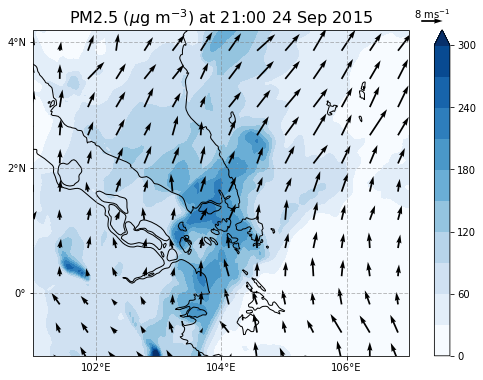

In [28]:
# zoomed view around Singapore
PM25_zoom = PM25.sel(bottom_top=0,south_north=slice(200,320),west_east=slice(190,330))
u_925_zoom = u_925.sel(south_north=slice(200,320),west_east=slice(190,330)) 
v_925_zoom = v_925.sel(south_north=slice(200,320),west_east=slice(190,330))
lats_zoom, lons_zoom = wrf.latlon_coords(PM25_zoom) 
cart_proj = wrf.get_cartopy(PM25_zoom)

fig2, ax2 = plt.subplots(figsize=(9,6),subplot_kw={'projection':cart_proj})

PM25_zoom.plot.contourf(x='XLONG',y='XLAT',vmin=0,vmax=300,
         levels=11,transform=ccrs.PlateCarree(),
         ax=ax2,cmap='Blues',cbar_kwargs={'label':''})
ax2.coastlines('10m')
ax2.set_extent([101,107,-1,4.2],crs=ccrs.PlateCarree())
ax2.set_xticks([102,104,106],crs=ccrs.PlateCarree())
ax2.set_yticks([0,2,4],crs=ccrs.PlateCarree())
ax2.set_xlabel('')
ax2.set_ylabel('')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
gl = ax2.gridlines(draw_labels=False,\
         linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([100, 102, 104, 106, 108])
gl.ylocator = mticker.FixedLocator([-2, 0, 2, 4, 6])

ax2.set_title('PM2.5 ($\mu$g m$^{-3}$) at '+title_str,fontdict={'size':16})

Q2 = ax2.quiver(wrf.to_np(lons_zoom[::10,::10]), wrf.to_np(lats_zoom[::10,::10]),
         wrf.to_np(u_925_zoom[::10, ::10]), wrf.to_np(v_925_zoom[::10, ::10]),
         transform=ccrs.PlateCarree(), units='inches')
qk2 = ax2.quiverkey(Q2, 0.78, 0.9, 8, r'8 ms$^{-1}$', labelpos='N',
         labelsep=0.01, coordinates='figure')

Text(0.5, 1.0, 'PM2.5 ($\\mu$g m$^{-3}$) at 21:00 24 Sep 2015')

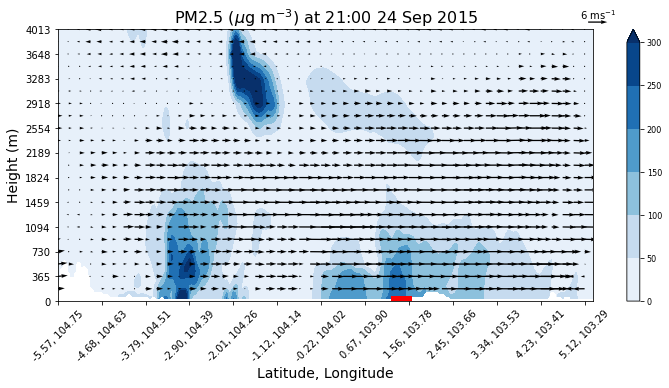

In [29]:
z = wrf.getvar(fin, "z", units="m")
wa = wrf.getvar(fin, "wa", units="m s-1")

start_point = wrf.CoordPair(lat=-5.55, lon=104.77)
end_point = wrf.CoordPair(lat=5.32, lon=103.2661)

PM25_cross = wrf.vertcross(PM25, z, wrfin=fin, start_point=start_point,
                 end_point=end_point, autolevels=500,latlon=True, meta=True) 
va_cross = wrf.vertcross(va, z, wrfin=fin, start_point=start_point, 
                 end_point=end_point, autolevels=500,latlon=True, meta=True) 
wa_cross = wrf.vertcross(wa, z, wrfin=fin, start_point=start_point,
                 end_point=end_point, autolevels=500,latlon=True, meta=True)

fig3,ax3 = plt.subplots(figsize=(12,5))
vert_vals = wrf.to_np(PM25_cross.coords["vertical"])
vert_level = np.argmax(vert_vals>4000.0)

contour_levels = [0, 50, 100, 150, 200, 250, 300]
PM25_contour = ax3.contourf(wrf.to_np(PM25_cross)[:vert_level+1,:],contour_levels, 
                            cmap='Blues',extend='max')  
PM25_contour.set_clim(vmin=0, vmax=300)
cb_PM25 = plt.colorbar(PM25_contour, ax=ax3)
cb_PM25.ax.tick_params(labelsize=8)

coord_pairs = wrf.to_np(PM25_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0]) 
x_labels = [pair.latlon_str("{:.2f}, {:.2f}") for pair in wrf.to_np(coord_pairs)]
ax3.set_xticks(x_ticks[::20])
ax3.set_xticklabels(x_labels[::20], rotation=45, fontsize=10)

vert_vals = vert_vals[:vert_level+1]
v_ticks = np.arange(vert_vals.shape[0])
y_labels = [f"{y:.0f}" for y in vert_vals]
ax3.set_yticks(v_ticks[::10])
ax3.set_yticklabels(y_labels[::10], fontsize=10)

ax3.set_xlabel("Latitude, Longitude", fontsize=14)
ax3.set_ylabel("Height (m)", fontsize=14)

Q3 = ax3.quiver(wrf.to_np(x_ticks[::5]),wrf.to_np(v_ticks[::5]),
        wrf.to_np(va_cross[:vert_level+1:5,::5]),
        wrf.to_np(wa_cross[:vert_level+1:5,::5]))
qk3 = ax3.quiverkey(Q3, 0.75, 0.9, 6, r'6 ms$^{-1}$', labelpos='N',
        labelsep=0.01, coordinates='figure')

singapore_start = 1.254
singapore_end = 1.478
line_lats, line_lons = wrf.pairs_to_latlon(coord_pairs)
ax_start = np.argmax(np.array(line_lats)>singapore_start)
ax_end = np.argmin(np.array(line_lats)<singapore_end)

ax3.plot([x_ticks[ax_start],x_ticks[ax_end]],
        [0,0],color="red", linewidth=10)

ax3.set_title('PM2.5 ($\mu$g m$^{-3}$) at '+title_str,fontdict={'size':16})

此外，我们还可以计算该区域的气溶胶光学厚度（aerosol optical depth, AOD）。它是消光系数在高度上的积分
$$
AOD = \int_0^{top}\tau(z) dz,
$$
其中，$z$ 为 WRF 网格的垂直高度，$\tau(z)$ 为高度 $z$ 处的消光系数。

这里我们使用 550 nm 光波的消光系数，WRF 中的变量名为 EXTCOF55。

In [30]:
zdiff = z.diff(dim='bottom_top')
extcof = wrf.getvar(fin,'EXTCOF55',squeeze=False)
aod = extcof.sel(bottom_top=slice(0,49))*zdiff 
aod = aod.sum(dim='bottom_top')/1000.0  # EXTCOF55 单位为 "km^-1"
fin.close()

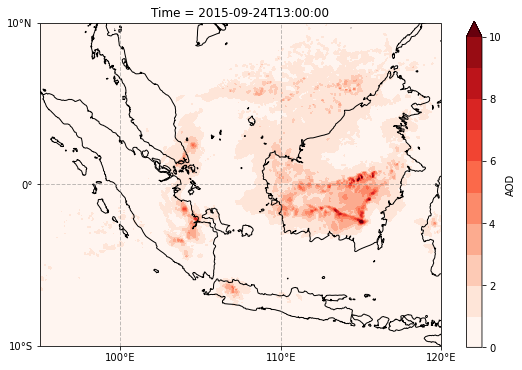

In [31]:
fig4, ax4 = plt.subplots(figsize=(9,6),subplot_kw={'projection':cart_proj})
aod.squeeze().plot.contourf(x='XLONG',y='XLAT',vmin=0,vmax=10,
        levels=11,transform=ccrs.PlateCarree(),
        ax=ax4,cmap='Reds',cbar_kwargs={'label':'AOD'})
ax4.coastlines('10m')
ax4.set_extent([95,120,-10,10], crs=ccrs.PlateCarree())
ax4.set_xticks([100,110,120], crs=ccrs.PlateCarree())
ax4.set_yticks([-10,0,10], crs=ccrs.PlateCarree())
ax4.set_xlabel('')
ax4.set_ylabel('')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)

gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,\
          linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([90, 100, 110, 120])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20])

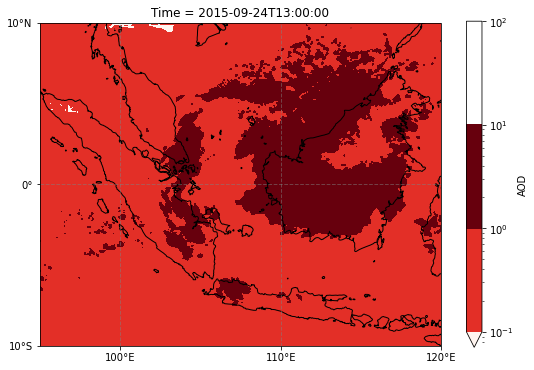

In [32]:
from matplotlib import colors 

fig5, ax5 = plt.subplots(figsize=(9,6),subplot_kw={'projection':cart_proj})
levels = np.power(10, [-1.,0.,1.,2.])
aod.squeeze().plot.contourf(x='XLONG',y='XLAT',#vmin=0,vmax=10,
        levels=levels,norm=colors.LogNorm(), transform=ccrs.PlateCarree(),
        ax=ax5, cmap='Reds',cbar_kwargs={'label':'AOD'})
ax5.coastlines('10m')
ax5.set_extent([95,120,-10,10], crs=ccrs.PlateCarree())
ax5.set_xticks([100,110,120], crs=ccrs.PlateCarree())
ax5.set_yticks([-10,0,10], crs=ccrs.PlateCarree())
ax5.set_xlabel('')
ax5.set_ylabel('')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)

gl = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,\
          linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([90, 100, 110, 120])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20])

#### NCL -> Python: geoCAT

https://geocat-examples.readthedocs.io/en/latest/gallery

#### MetPy

https://unidata.github.io/MetPy/latest/index.html

#### Unidata Python Gallery

https://unidata.github.io/python-training/gallery/gallery-home/

### 时间序列分析和可视化

Python 提供了很多辅助工具来处理时间序列

- 标准库：date, datetime

- Pandas: pandas.to_datetime, pandas.date_range
    
- Matplotlib: matplotlib.dates

我们利用 Global Historical Climate Network Daily (GHCND) 数据，探讨广州和阳江 1951-2019 气候日变化特征。

In [33]:
import pandas as pd

In [34]:
ghcnd = pd.read_csv('GHCN_GZ_YJ.csv')

In [35]:
ghcnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          50191 non-null  object 
 1   NAME             50191 non-null  object 
 2   LATITUDE         50191 non-null  float64
 3   LONGITUDE        50191 non-null  float64
 4   ELEVATION        50191 non-null  float64
 5   DATE             50191 non-null  object 
 6   PRCP             47952 non-null  float64
 7   PRCP_ATTRIBUTES  47952 non-null  object 
 8   TAVG             50068 non-null  float64
 9   TAVG_ATTRIBUTES  50068 non-null  object 
 10  TMAX             46154 non-null  float64
 11  TMAX_ATTRIBUTES  46154 non-null  object 
 12  TMIN             48338 non-null  float64
 13  TMIN_ATTRIBUTES  48338 non-null  object 
dtypes: float64(7), object(7)
memory usage: 5.4+ MB


In [36]:
ghcnd.DATE = pd.to_datetime(ghcnd.DATE)
ghcnd = ghcnd.drop(['ELEVATION','PRCP_ATTRIBUTES','TAVG_ATTRIBUTES',
                    'TMAX_ATTRIBUTES','TMIN_ATTRIBUTES'],axis=1)
gz = ghcnd[ghcnd.NAME=='GUANGZHOU, CH']
yj = ghcnd[ghcnd.NAME=='YANGJIANG, CH']

In [37]:
gz = gz.set_index('DATE')
yj = yj.set_index('DATE')

In [38]:
gz = gz['1949':'2019']
yj = yj['1949':'2019']

为确保时间序列的时间是连续的，一般需要重新指定 index 值

In [39]:
gz = gz.reindex(pd.date_range('1951-01-01','2019-12-31',freq='D'))
yj = yj.reindex(pd.date_range('1952-01-01','2019-12-31',freq='D'))

In [40]:
gz.describe()

,LATITUDE,LONGITUDE,PRCP,TAVG,TMAX,TMIN
count,2.517500e+04,2.517500e+04,24084.000000,25054.000000,22876.000000,24084.000000
mean,2.321700e+01,1.134830e+02,5.200872,22.270316,26.459901,18.962647
std,3.552784e-15,2.842227e-14,14.496849,6.167283,6.345923,6.306987
min,2.321700e+01,1.134830e+02,0.000000,2.900000,4.300000,0.000000
25%,2.321700e+01,1.134830e+02,0.000000,17.700000,22.300000,14.200000
50%,2.321700e+01,1.134830e+02,0.000000,23.700000,27.700000,20.600000
75%,2.321700e+01,1.134830e+02,2.700000,27.400000,31.600000,24.400000
max,2.321700e+01,1.134830e+02,284.900000,34.400000,39.100000,30.400000


In [41]:
yj.describe()

,LATITUDE,LONGITUDE,PRCP,TAVG,TMAX,TMIN
count,2.480800e+04,2.480800e+04,23662.000000,24806.000000,23092.00000,24062.000000
mean,2.186700e+01,1.119670e+02,6.778747,22.545283,26.32681,19.702593
std,7.105571e-15,2.842228e-14,22.218934,5.512921,5.48785,5.842219
min,2.186700e+01,1.119670e+02,0.000000,3.200000,5.70000,-1.400000
25%,2.186700e+01,1.119670e+02,0.000000,18.600000,23.00000,15.400000
50%,2.186700e+01,1.119670e+02,0.000000,23.900000,27.50000,21.400000
75%,2.186700e+01,1.119670e+02,2.700000,27.200000,30.70000,24.600000
max,2.186700e+01,1.119670e+02,605.300000,32.300000,38.30000,28.800000


我们先来求历史上的最高、最低温度记录，以及最高日降雨量记录

In [42]:
gz.TMAX.max(), gz.TMAX.idxmax(), gz.TMIN.min(), gz.TMIN.idxmin(), gz.PRCP.max(), gz.PRCP.idxmax()

(39.1,
 Timestamp('2004-07-01 00:00:00', freq='D'),
 0.0,
 Timestamp('1957-02-11 00:00:00', freq='D'),
 284.9,
 Timestamp('1955-06-06 00:00:00', freq='D'))

In [43]:
yj.TMAX.max(), yj.TMAX.idxmax(), yj.TMIN.min(), yj.TMIN.idxmin(), yj.PRCP.max(), yj.PRCP.idxmax()

(38.3,
 Timestamp('2005-07-19 00:00:00', freq='D'),
 -1.4,
 Timestamp('1955-01-12 00:00:00', freq='D'),
 605.3,
 Timestamp('2001-06-08 00:00:00', freq='D'))

In [44]:
gz.at[gz.index,'dayofyear'] = gz.index.dayofyear
yj.at[yj.index,'dayofyear'] = yj.index.dayofyear

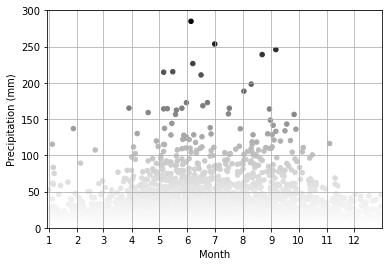

In [45]:
ax = gz.plot.scatter('dayofyear','PRCP',c=gz.PRCP.values)
ax.set_xlim([-0.5,366.5])
ax.set_ylim([0,300])
ax.set_xticks([1,32,61,92,122,153,183,214,245,275,306,336])
ax.set_xticklabels([str(i) for i in range(1,13)])
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation (mm)')
ax.grid()

In [46]:
gz_monthly_rain = gz.PRCP.resample('M').sum()

Text(0, 0.5, 'Monthly rainfall (mm)')

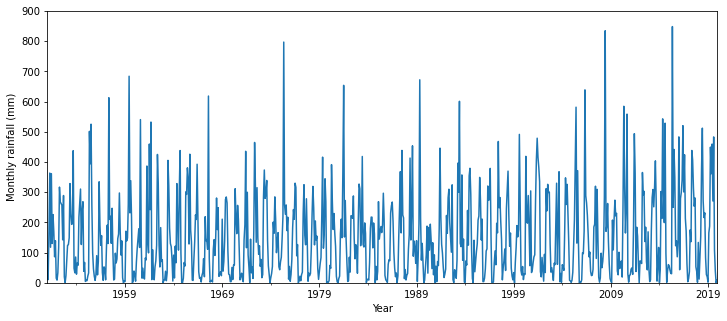

In [47]:
fig,ax = plt.subplots(figsize=(12,5))
gz_monthly_rain.plot(ax=ax)
ax.set_ylim([0,900])
ax.set_xlabel('Year')
ax.set_ylabel('Monthly rainfall (mm)')

<AxesSubplot:>

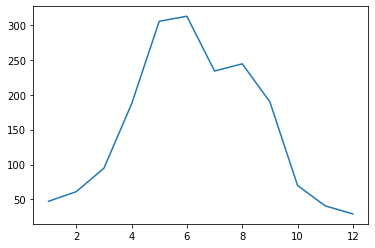

In [48]:
gz_monthly_rain.groupby(gz_monthly_rain.index.month).mean().plot()

<AxesSubplot:>

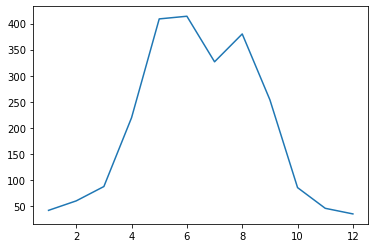

In [49]:
yj_monthly_rain = yj.PRCP.resample('M').sum()
yj_monthly_rain.groupby(yj_monthly_rain.index.month).mean().plot()

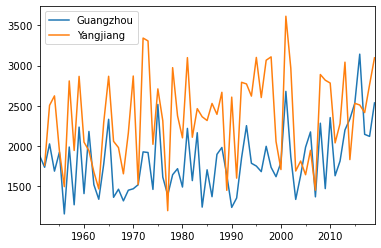

In [50]:
ax = gz.PRCP.resample('A').sum().plot(label='Guangzhou')
yj.PRCP.resample('A').sum().plot(ax=ax,label='Yangjiang')
ax.legend()

#### 极端天气分析

我们分析每年下雨的天数、高温（$>35 ^oC$) 的天数以及低温（$<10 ^oC$）的天数

In [51]:
gz_rainyDays = gz[gz.PRCP>0.]
gz_rainyDays = gz_rainyDays.groupby(gz_rainyDays.index.year)['PRCP'].count()
gz_hotDays = gz[gz.TMAX>=35.0]
gz_hotDays = gz_hotDays.groupby(gz_hotDays.index.year)['TMAX'].count()
gz_coldDays = gz[gz.TMIN<=10.0]
gz_coldDays = gz_coldDays.groupby(gz_coldDays.index.year)['TMIN'].count()

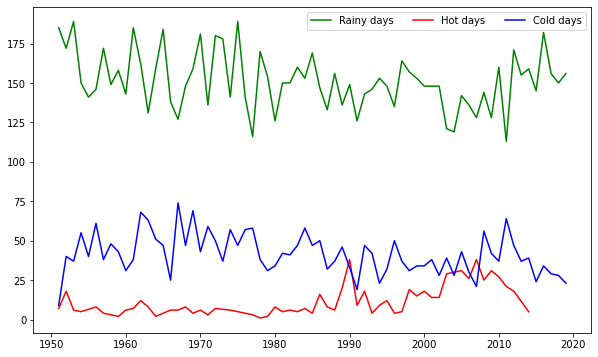

In [52]:
fig,ax = plt.subplots(figsize=(10,6))

gz_rainyDays.plot(ax=ax,color='g',label='Rainy days')
gz_hotDays.plot(ax=ax,color='r',label='Hot days')
gz_coldDays.plot(ax=ax,color='b',label='Cold days')
ax.legend(ncol=3)

In [53]:
yj_rainyDays = yj[yj.PRCP>0.]
yj_rainyDays = yj_rainyDays.groupby(yj_rainyDays.index.year)['PRCP'].count()
yj_hotDays = yj[yj.TMAX>=35.0]
yj_hotDays = yj_hotDays.groupby(yj_hotDays.index.year)['TMAX'].count()
yj_coldDays = yj[yj.TMIN<=10.0]
yj_coldDays = yj_coldDays.groupby(yj_coldDays.index.year)['TMIN'].count()

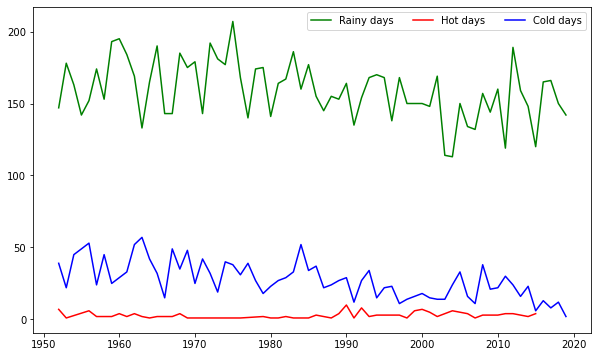

In [54]:
fig,ax = plt.subplots(figsize=(10,6))

yj_rainyDays.plot(ax=ax,color='g',label='Rainy days')
yj_hotDays.plot(ax=ax,color='r',label='Hot days')
yj_coldDays.plot(ax=ax,color='b',label='Cold days')
ax.legend(ncol=3)

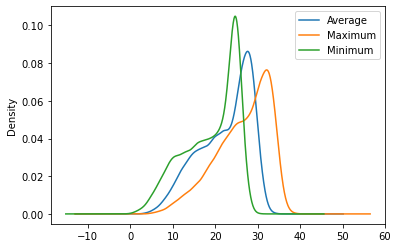

In [55]:
#ax = gz.TAVG.plot(kind='kde',label='Average')
#gz.TMAX.plot(ax=ax,kind='kde',label='Maximum')
#gz.TMIN.plot(ax=ax,kind='kde',label='Minimum')
#ax.legend()
ax = gz[['TAVG','TMAX','TMIN']].plot.kde()
ax.legend(['Average','Maximum','Minimum'])

[Text(0, 0, '1'),
 Text(31, 0, '2'),
 Text(59, 0, '3'),
 Text(90, 0, '4'),
 Text(120, 0, '5'),
 Text(151, 0, '6'),
 Text(181, 0, '7'),
 Text(212, 0, '8'),
 Text(243, 0, '9'),
 Text(273, 0, '10'),
 Text(304, 0, '11'),
 Text(334, 0, '12')]

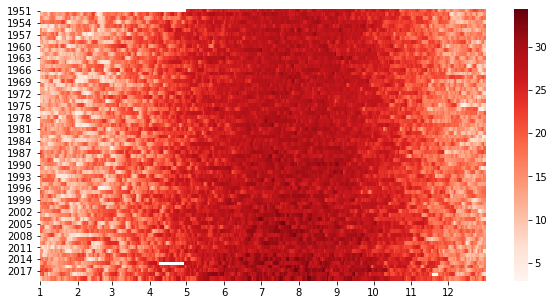

In [56]:
import calendar
import seaborn as sns

groups = gz.TAVG.groupby(pd.Grouper(freq='AS'))
years = pd.DataFrame()

for name, group in groups:
    if calendar.isleap(name.year):
        years[name.year] = np.delete(group.values,59)
    else:
        years[name.year] = group.values

years = years.T
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(years,cmap='Reds')
ax.set_xticks([0,31,59,90,120,151,181,212,243,273,304,334])
ax.set_xticklabels([str(i) for i in range(1,13)],rotation=0)

<AxesSubplot:xlabel='Month', ylabel='Year'>

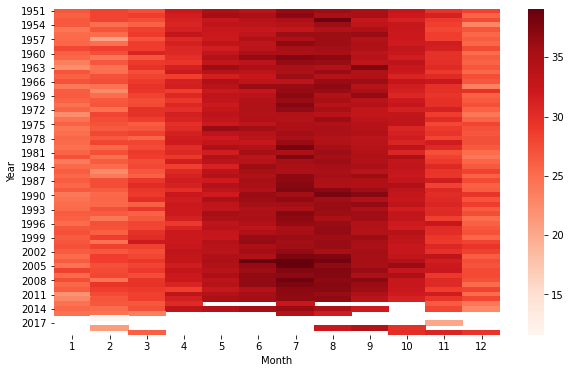

In [57]:
fig,ax = plt.subplots(figsize=(10,6))
gz_annual_max_temp = gz.TMAX.resample('MS').max()
gz_annual_max_temp = pd.DataFrame(gz_annual_max_temp)
gz_annual_max_temp['Year'] = gz_annual_max_temp.index.year
gz_annual_max_temp['Month'] = gz_annual_max_temp.index.month
max_temp = gz_annual_max_temp.pivot("Year","Month","TMAX")
sns.heatmap(max_temp,cmap='Reds')

<AxesSubplot:xlabel='Month', ylabel='Year'>

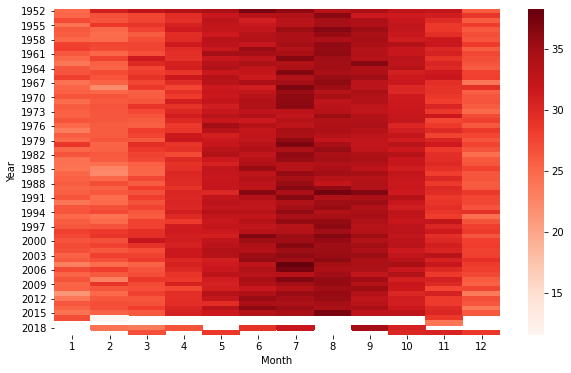

In [58]:
fig,ax = plt.subplots(figsize=(10,6))
yj_annual_max_temp = yj.TMAX.resample('MS').max()
yj_annual_max_temp = pd.DataFrame(yj_annual_max_temp)
yj_annual_max_temp['Year'] = yj_annual_max_temp.index.year
yj_annual_max_temp['Month'] = yj_annual_max_temp.index.month
max_temp = yj_annual_max_temp.pivot("Year","Month","TMAX")
sns.heatmap(max_temp,cmap='Reds')

<AxesSubplot:>

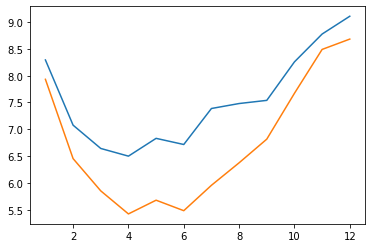

In [59]:
gz['DTR'] = gz['TMAX']-gz['TMIN']
gz.DTR.groupby(gz.index.month).mean().plot()
yj['DTR'] = yj['TMAX']-yj['TMIN']
yj.DTR.groupby(yj.index.month).mean().plot()